In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from scipy import stats
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd


In [423]:
df = pd.read_csv('Seattle.csv')

In [427]:
df.columns.to_list()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [249]:
cols = ['cleaning_fee','price','extra_people']
for i in cols:
    df[i] = df[i].str.replace('$','')
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

df['amenities'] = df['amenities'].str.replace("{",'').str.replace("}",'').str.split()
df['amenities'] = df['amenities'].apply(lambda x: len(x))

In [250]:
dates = ['host_since','first_review','last_review','last_scraped']
data = pd.concat([df[dates],df[cont_var] ,df[cat_var]],1)

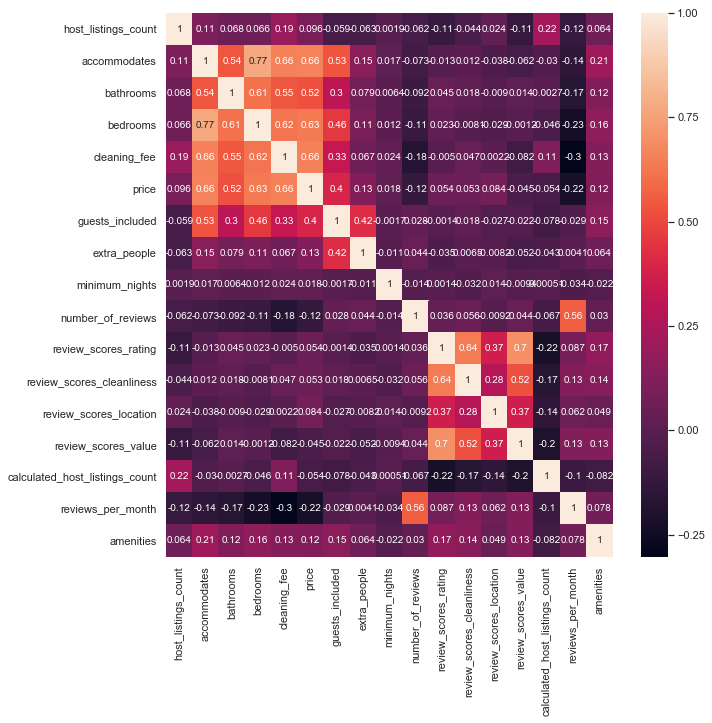

In [251]:
cont_var = ['host_listings_count','accommodates','bathrooms','bedrooms',
           'cleaning_fee','price','guests_included','extra_people','minimum_nights','number_of_reviews',
           'review_scores_rating','review_scores_cleanliness','review_scores_location','review_scores_value','calculated_host_listings_count',
           'reviews_per_month','amenities']

cat_var = ['host_response_time','host_acceptance_rate','host_has_profile_pic',
          'neighbourhood_cleansed','property_type','room_type',
          'bed_type','cancellation_policy','require_guest_profile_picture',
         'require_guest_phone_verification']

f,ax = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(data[cont_var].corr(), annot = True)


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 27 columns):
host_listings_count                 3816 non-null float64
accommodates                        3818 non-null int64
bathrooms                           3802 non-null float64
bedrooms                            3812 non-null float64
cleaning_fee                        2788 non-null float64
price                               3817 non-null float64
guests_included                     3818 non-null int64
extra_people                        3818 non-null float64
minimum_nights                      3818 non-null int64
number_of_reviews                   3818 non-null int64
review_scores_rating                3171 non-null float64
review_scores_cleanliness           3165 non-null float64
review_scores_location              3163 non-null float64
review_scores_value                 3162 non-null float64
calculated_host_listings_count      3818 non-null int64
reviews_per_month                

### EDA :

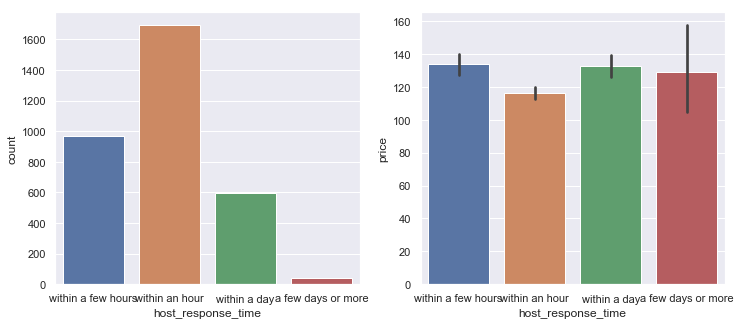

In [57]:

f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = 'host_response_time',ax = ax[0], data = data)
sns.barplot(x = 'host_response_time',y = 'price',ax = ax[1], data = data)

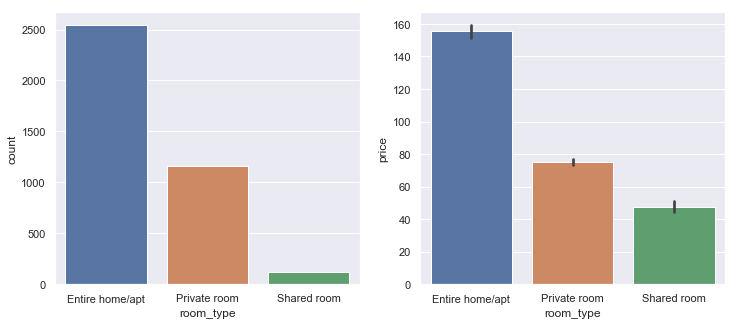

In [60]:
f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = 'room_type',ax = ax[0], data = data)
sns.barplot(x = 'room_type',y = 'price',ax = ax[1], data = data)

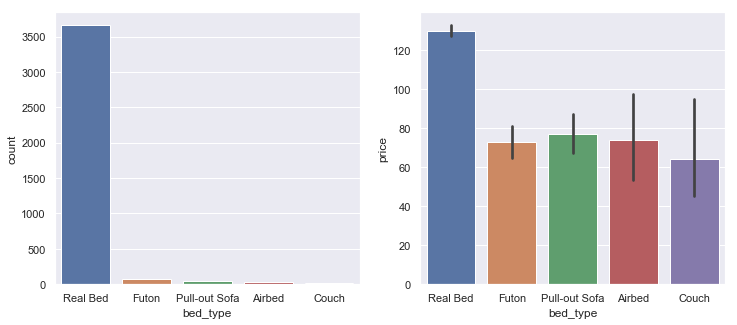

In [62]:
f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = 'bed_type',ax = ax[0], data = data)
sns.barplot(x = 'bed_type',y = 'price',ax = ax[1], data = data)

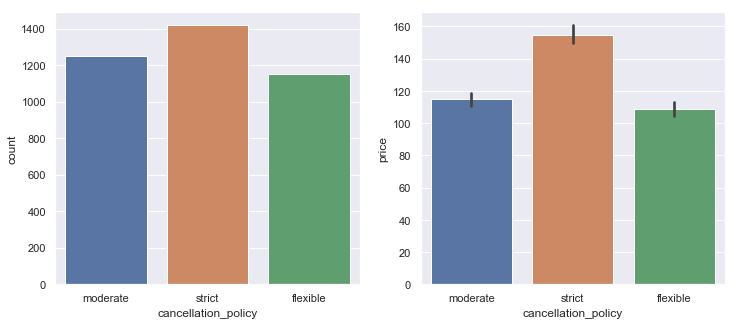

In [63]:
f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = 'cancellation_policy',ax = ax[0], data = data)
sns.barplot(x = 'cancellation_policy',y = 'price',ax = ax[1], data = data)

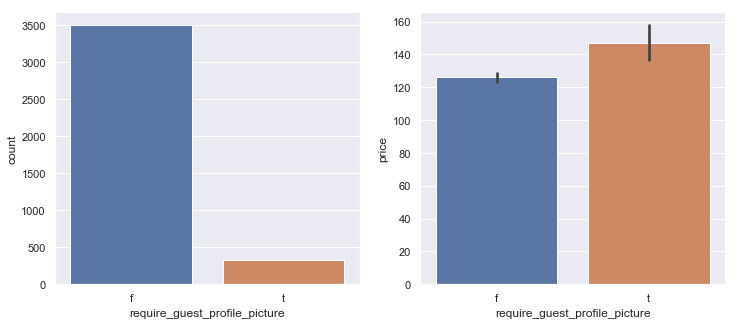

In [64]:
f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = 'require_guest_profile_picture',ax = ax[0], data = data)
sns.barplot(x = 'require_guest_profile_picture',y = 'price',ax = ax[1], data = data)

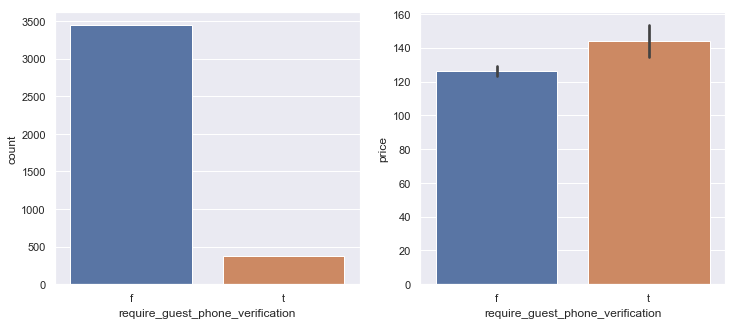

In [65]:
f,ax = plt.subplots(1,2,figsize = (12,5))
sns.countplot(x = 'require_guest_phone_verification',ax = ax[0], data = data)
sns.barplot(x = 'require_guest_phone_verification',y = 'price',ax = ax[1], data = data)

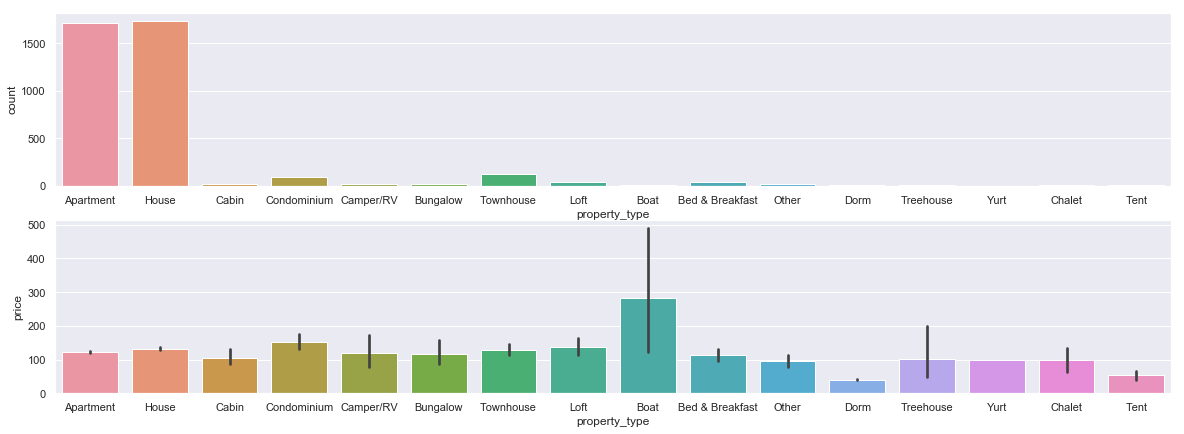

In [68]:
f,ax = plt.subplots(2,1,figsize = (20,7))
sns.countplot(x = 'property_type',ax = ax[0], data = data)
sns.barplot(x = 'property_type',y = 'price',ax = ax[1], data = data)

In [259]:

dates_df = data[dates + ['price']].dropna()

dates_df['last_review'] = pd.to_datetime(dates_df['last_review'])
dates_df['first_review'] = pd.to_datetime(dates_df['first_review'])
dates_df['host_since'] = pd.to_datetime(dates_df['host_since'])
dates_df['days_Airbnb'] = (dates_df['last_review'].dt.year - dates_df['host_since'].dt.year)


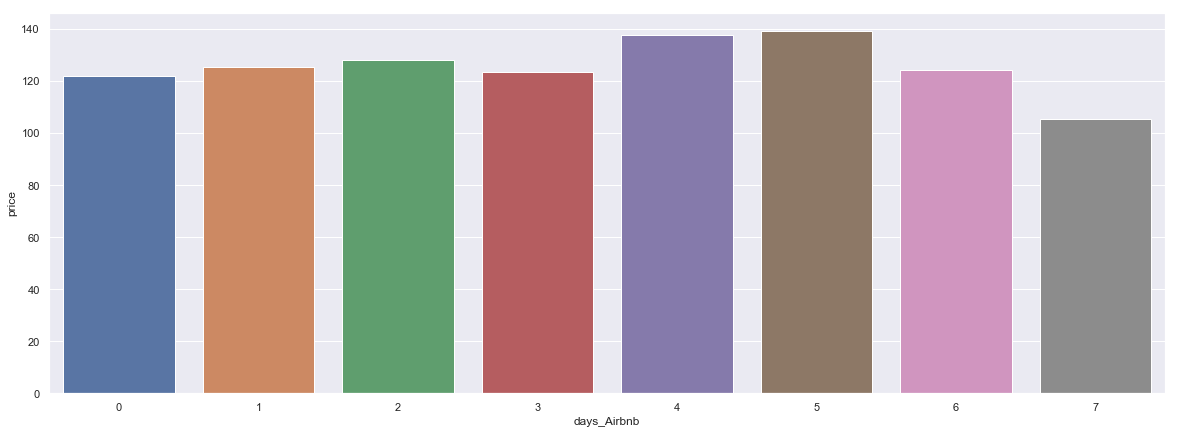

In [260]:
f,ax = plt.subplots(1,1,figsize = (20,7))
sns.barplot(x = 'days_Airbnb' , y = 'price', data= dates_df, ci = False)

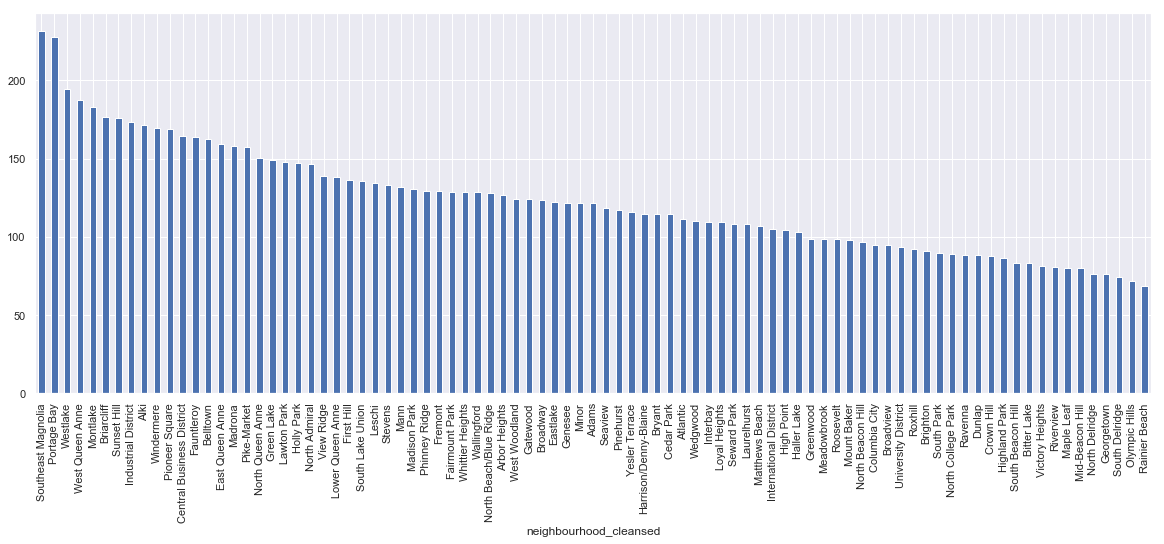

In [90]:
f,ax = plt.subplots(1,1,figsize = (20,7))
data.groupby('neighbourhood_cleansed').price.mean().sort_values(ascending = False).plot(kind = 'bar')


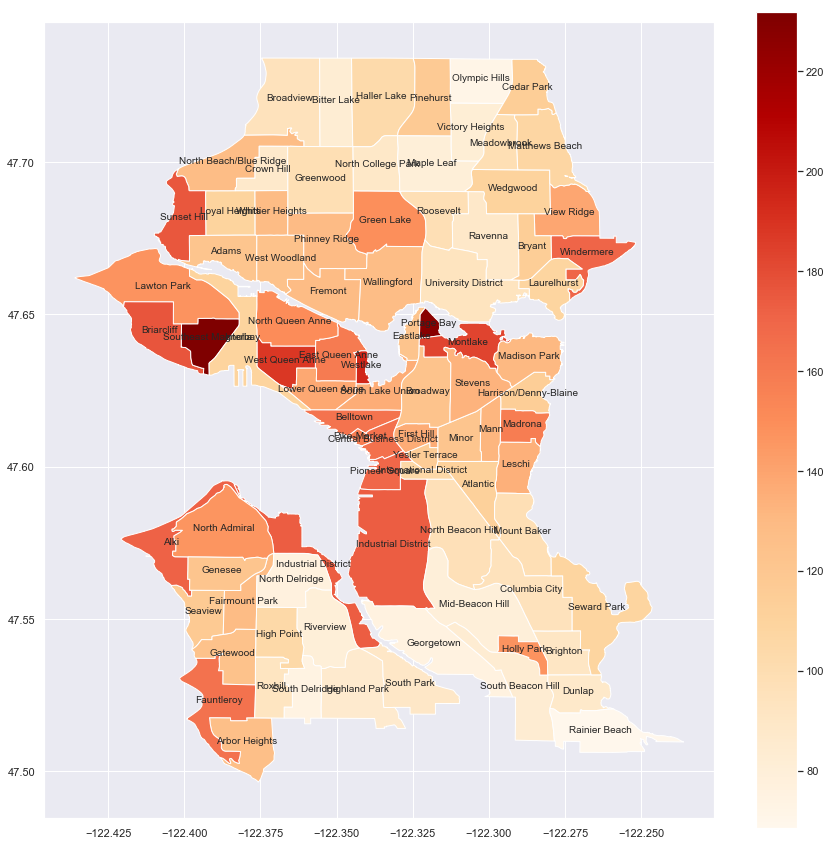

In [411]:
## neighbourhood maps
gdf = gpd.read_file('City_Clerk_Neighborhoods.shp')
nbd_df = data.groupby('neighbourhood_cleansed')['price','bedrooms','bathrooms','accommodates'].mean().reset_index()
gdf= gpd.GeoDataFrame(gdf.merge(nbd_df,left_on = 'S_HOOD', right_on = 'neighbourhood_cleansed'))
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax = gdf.plot(column = 'price', legend = True, ax = ax1, cmap='OrRd')
gdf.apply(lambda x: ax.annotate(s=x.S_HOOD, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);




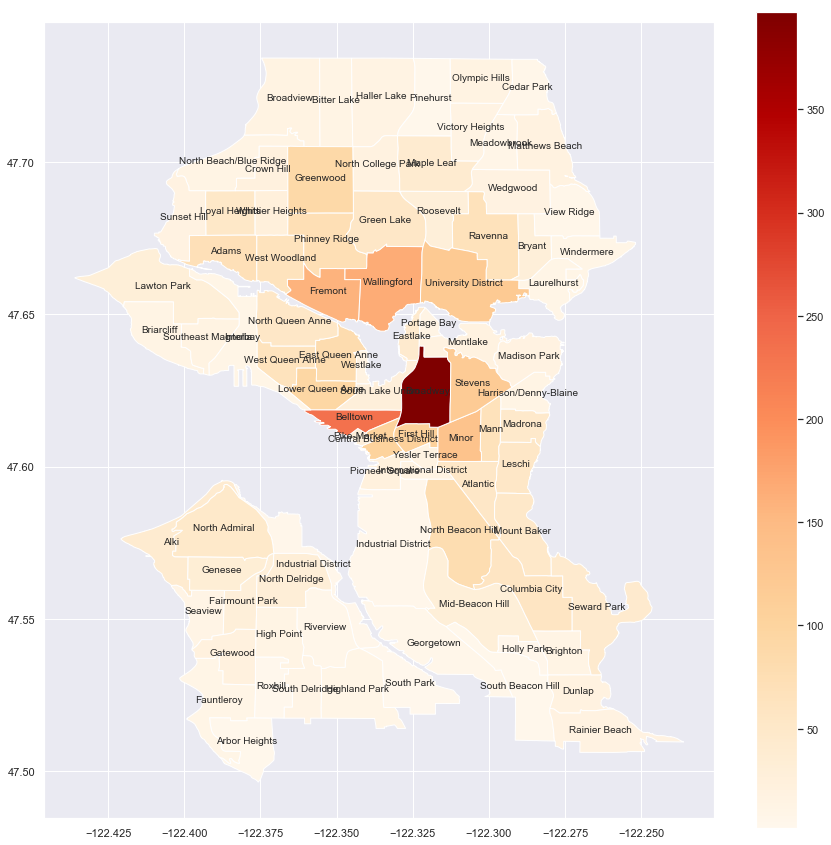

In [421]:

## neighbourhood maps
gdf = gpd.read_file('City_Clerk_Neighborhoods.shp')
nbd_df = data.groupby('neighbourhood_cleansed')['price','bedrooms','bathrooms','accommodates'].count().reset_index()
gdf= gpd.GeoDataFrame(gdf.merge(nbd_df,left_on = 'S_HOOD', right_on = 'neighbourhood_cleansed'))
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax = gdf.plot(column = 'price', legend = True, ax = ax1, cmap='OrRd')
gdf.apply(lambda x: ax.annotate(s=x.S_HOOD, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);






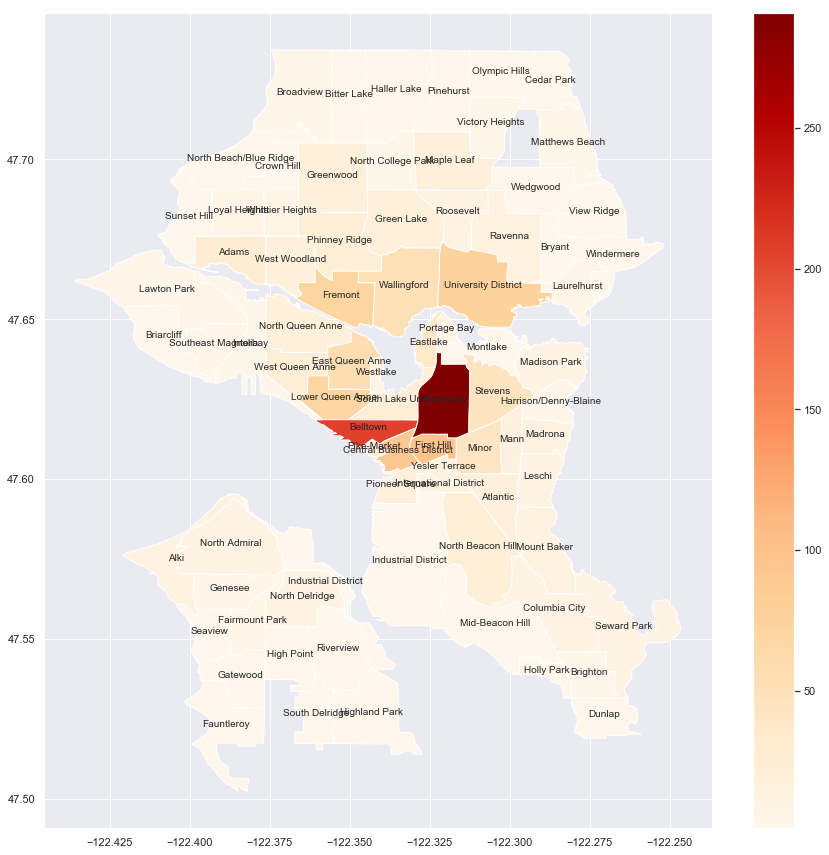

In [429]:

## neighbourhood maps
gdf = gpd.read_file('City_Clerk_Neighborhoods.shp')
nbd_df = data[data['property_type'] == 'Apartment'].groupby('neighbourhood_cleansed')['price','bedrooms','bathrooms','accommodates'].count().reset_index()
gdf= gpd.GeoDataFrame(gdf.merge(nbd_df,left_on = 'S_HOOD', right_on = 'neighbourhood_cleansed'))
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax = gdf.plot(column = 'bedrooms', legend = True, ax = ax1, cmap='OrRd')
gdf.apply(lambda x: ax.annotate(s=x.S_HOOD, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);




In [436]:

X = data.groupby('neighbourhood_cleansed').price.count() * 100/ data.shape[0]
X.sort_values(ascending = False).head(2)

neighbourhood_cleansed
Broadway    10.398114
Belltown     6.128863
Name: price, dtype: float64

Text(0.5,1,'Price Distribution')

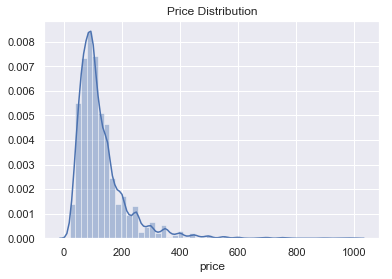

In [263]:
_ = sns.distplot(data['price'].dropna())
_.set_title('Price Distribution')

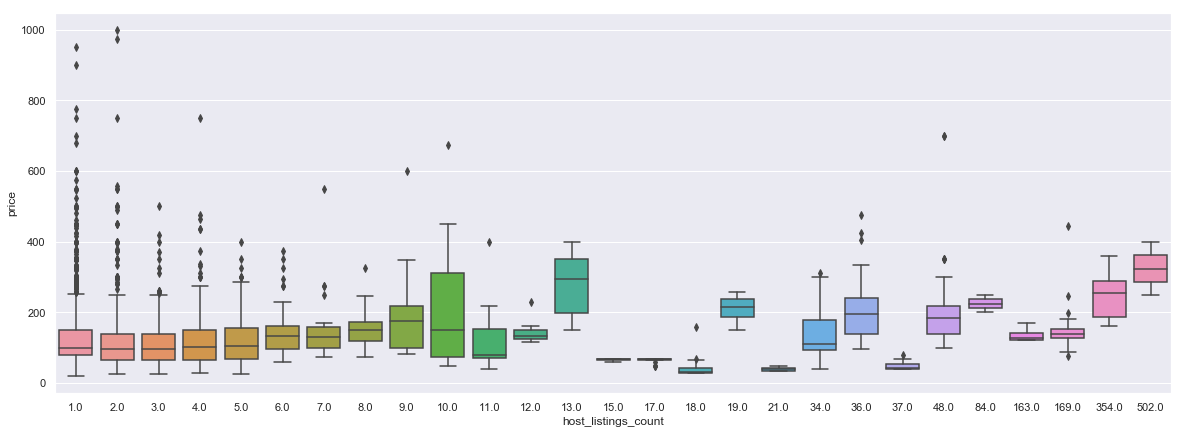

In [270]:
f,ax = plt.subplots(1,1,figsize = (20,7))
sns.boxplot(x = data['host_listings_count'],y = data['price'])

Text(0.5,1,'review_scores_value vs price')

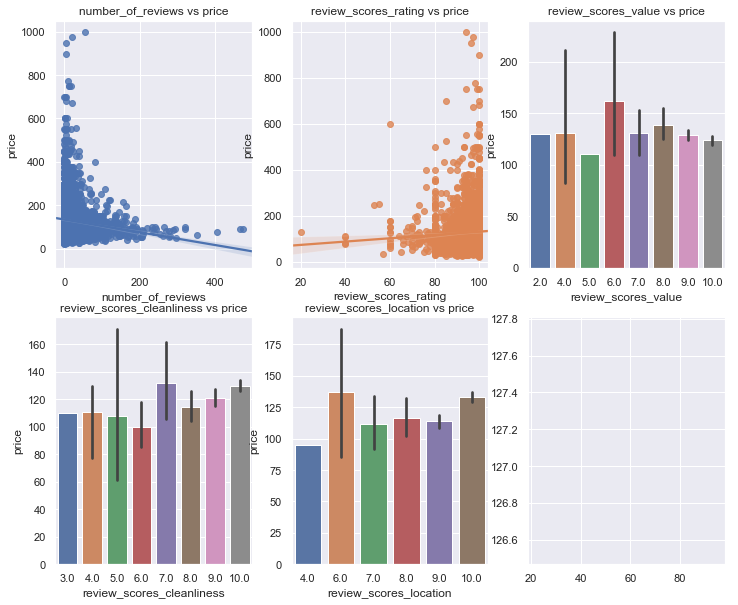

In [345]:
f,ax = plt.subplots(2,3,figsize = (12,10))
min_nights = data['minimum_nights'].quantile(0.995)

data['minimum_nights'] = data['minimum_nights'].map(lambda x: min(x,min_nights))


sns.regplot(x = data['number_of_reviews'],y = data['price'],ax = ax[0,0])
ax[0,0].set_title('number_of_reviews vs price')
sns.regplot(x = data['review_scores_rating'],y = data['price'],ax = ax[0,1])
ax[0,1].set_title('review_scores_rating vs price')
sns.barplot(x = data['review_scores_cleanliness'],y = data['price'],ax = ax[1,0])
ax[1,0].set_title('review_scores_cleanliness vs price')
sns.barplot(x = data['review_scores_location'],y = data['price'],ax = ax[1,1])
ax[1,1].set_title('review_scores_location vs price')
sns.barplot(x = data['review_scores_value'],y = data['price'],ax = ax[0,2])
ax[0,2].set_title('review_scores_value vs price')


In [326]:

def get_jointgrid(x,y):
    g = sns.JointGrid(x= x, y= y, data=data)
    g = g.plot(sns.regplot, sns.distplot)
    g = g.annotate(stats.pearsonr)

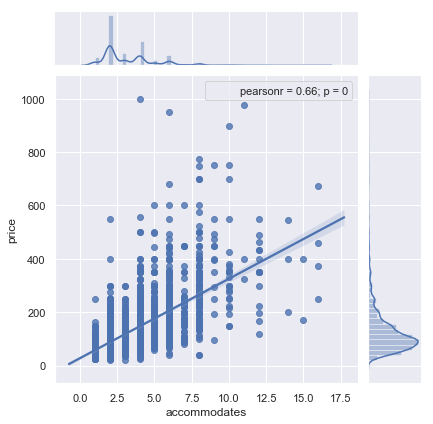

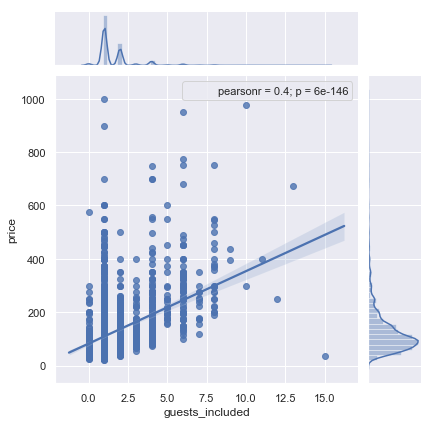

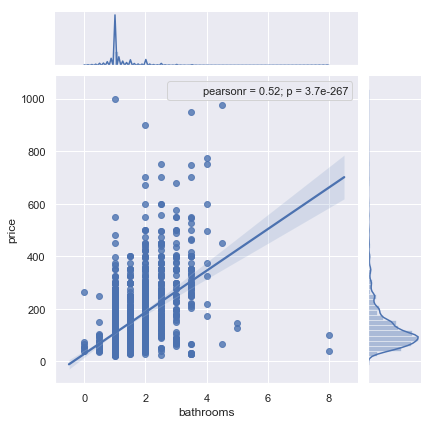

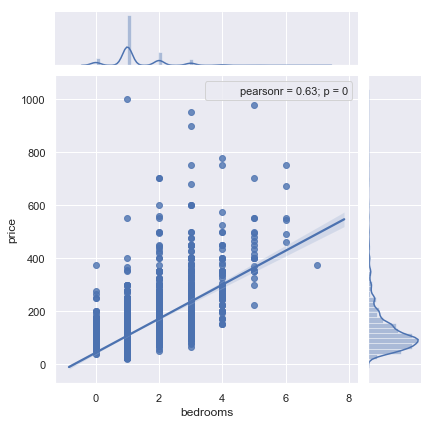

In [333]:

get_jointgrid('accommodates','price')
get_jointgrid('guests_included','price')
get_jointgrid('bathrooms','price')
get_jointgrid('bedrooms','price')


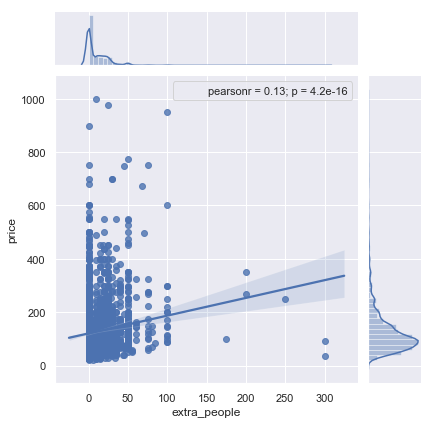

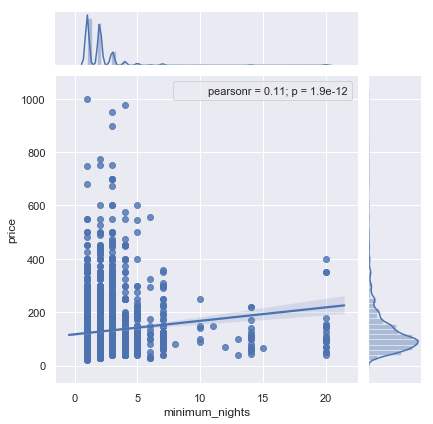

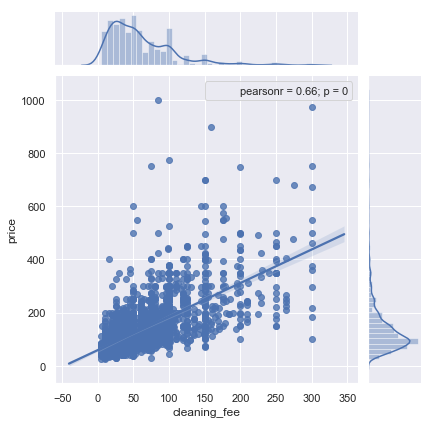

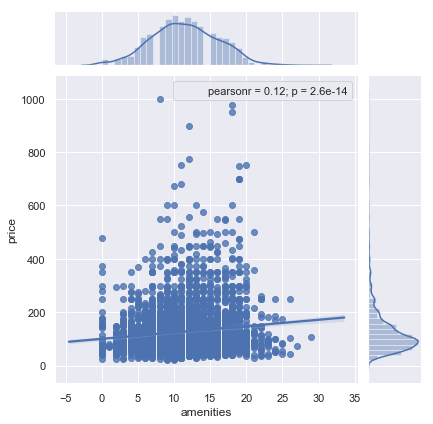

In [334]:
get_jointgrid('extra_people','price')
get_jointgrid('minimum_nights','price')
get_jointgrid('cleaning_fee','price')
get_jointgrid('amenities','price')

#### Conclusion : 
- expensive airbnb houses/apts belongs to neighbourhoods like Southwest Magnolia, Portage Bay with average price as high as 290\$
- The most common property type in the data are apartments and houses with prices that are fairly less as compared to rare properties like boats and condoniums
- host's with strict cancellation policies offer their properties at higher price as compared to moderate and flexible prices.
- Entire home is more expensive than shared or a private room and properties with a real bed are  comparitively more expensive
- the higher the number of bedrooms, bathrooms, guests are, the higher the price
- price and cleaning fee incerases linearly too
-  Properties on the neighbourhood that are closer to the water body cost higher than others
- Broadway and Beltown has the highest (10\% abd 6\%) percenatge  of the data
- bedrooms nad acoommodated are highly corellated. We can create a new variable that takes into acct these two variables